<a href="https://colab.research.google.com/github/LinaMariaCastro/curso-ia-para-economia/blob/main/clases/5_Aprendizaje_supervisado/3_Taller_Regresion_Logistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Inteligencia Artificial con Aplicaciones en Economía I**

- 👩‍🏫 **Profesora:** [Lina María Castro](https://www.linkedin.com/in/lina-maria-castro)  
- 📧 **Email:** [lmcastroco@gmail.com](mailto:lmcastroco@gmail.com)  
- 🎓 **Universidad:** Universidad Externado de Colombia - Facultad de Economía

# **Taller: Regresión Logística**

**IMPORTANTE**: Guarda una copia de este notebook en tu Google Drive o computador.

**Taller en parejas**

**Nombres estudiantes:**

- Dairon Ferney Reina Sabogal
-

**Forma de entrega**

Jupyter Notebook publicado en su cuenta de Github con el nombre “Taller_Reg_Logist_apellidos.ipynb”.

**Plazo de entrega**

4 de noviembre, máximo a las 11:59 p.m., debes enviar link del notebook al correo lina.castro6@uexternado.edu.co, de lo contrario, no será tenido en cuenta.

**Instrucciones Generales**

Completa el código en las celdas marcadas con `### TU CÓDIGO AQUÍ ###`. Puedes añadir más celdas si lo requieres.

**Contexto del Caso: Consultoría de Fuga de Clientes (Churn)**

Somos un equipo de consultores contratados por "TelcoSur", una empresa de telecomunicaciones preocupada por su tasa de cancelación de servicios (Churn). Retener a un cliente existente es entre 5 y 25 veces más barato que adquirir uno nuevo, por lo que predecir quiénes están en riesgo de irse es crucial para la salud financiera de la empresa.

**Tu Misión:** Como científico de datos, tu objetivo es construir un modelo de clasificación que identifique a los clientes con alta probabilidad de cancelar su contrato. El departamento de marketing utilizará tu modelo para lanzar una campaña de retención (ofreciendo descuentos y beneficios) a un grupo selecto de clientes.

## Ejercicio 1: Importar Librerías y Cargar Datos

### 1.1. Importa las librerías necesarias

In [3]:
### TU CÓDIGO AQUÍ ###
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, roc_auc_score

Mejorar visualización de dataframes y gráficos

In [4]:
# Que muestre todas las columnas
pd.options.display.max_columns = None
# En los dataframes, mostrar los float con dos decimales
pd.options.display.float_format = '{:,.2f}'.format

# Configuraciones para una mejor visualización
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

### 1.2. Carga el dataset

Carga el dataset "WA_Fn-UseC_-Telco-Customer-Churn.csv" que se encuentra en la carpeta 'datasets' del repositorio del curso.

**Explicación de las variables:**

- customerID: Identificador único para cada cliente.
- gender: Género del cliente (Masculino/Femenino).
- SeniorCitizen: Indica si el cliente es un ciudadano mayor (adulto mayor) (1 = Sí, 0 = No).
- Partner: Indica si el cliente tiene pareja (Sí/No).
- Dependents: Indica si el cliente tiene dependientes (Sí/No).
- tenure: Número de meses que el cliente ha estado con la compañía (Antigüedad).
- PhoneService: Si el cliente está suscrito al servicio telefónico (Sí/No).
- MultipleLines: Indica si el cliente tiene múltiples líneas telefónicas (Sí/No/Sin servicio telefónico).
- InternetService: Tipo de servicio de internet suscrito (DSL, Fibra óptica, No).
- OnlineSecurity: Indica si el cliente tiene el complemento de seguridad en línea (Sí/No/Sin servicio de internet).
- OnlineBackup: Indica si el cliente usa el servicio de respaldo en línea (Sí/No/Sin servicio de internet).
- DeviceProtection: Indica si el cliente tiene protección de dispositivos (Sí/No/Sin servicio de internet).
- TechSupport: Indica si el cliente tiene suscripción a soporte técnico (Sí/No/Sin servicio de internet).
- StreamingTV: Indica si el cliente hace streaming de TV (Sí/No/Sin servicio de internet).
- StreamingMovies: Indica si el cliente hace streaming de películas (Sí/No/Sin servicio de internet).
- Contract: Tipo de contrato (Mes a mes, Un año, Dos años).
- PaperlessBilling: Si el cliente usa facturación electrónica (sin papel) (Sí/No).
- PaymentMethod: Método de pago usado por el cliente (Cheque electrónico, Cheque enviado por correo, Transferencia bancaria, Tarjeta de crédito).
- MonthlyCharges: El monto cobrado al cliente mensualmente (Cargos mensuales).
- TotalCharges: El monto total cobrado al cliente durante su antigüedad (Cargos totales).
- Churn: Indica si el cliente ha cancelado el servicio (Sí/No). --> **Esta es la variable objetivo**

In [5]:
### TU CÓDIGO AQUÍ ###
path = r"C:\Users\Ferney Reina\Documents\Python\IA_Economia\2025-segundo-semestre-ia-economia\datasets"
os.chdir(path)
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Ejercicio 2: Limpieza de Datos

Antes de modelar, debemos entender y limpiar nuestros datos.

### 2.1. Revisa los tipos de datos y busca valores nulos.

Pista: Usa `df.info()`.

In [6]:
### TU CÓDIGO AQUÍ ###
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### 2.2. Convierte TotalCharges a un tipo de dato numérico.

Aquellos valores que no se puedan convertir (errores), transfórmalos en NaN (Not a Number).  

Pista: Usa pd.to_numeric(df['TotalCharges'], errors='coerce').

In [7]:
### TU CÓDIGO AQUÍ ###
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

### 2.3. Investiga cuántos valores nulos tienes en la columna TotalCharges.

In [8]:
### TU CÓDIGO AQUÍ ##
df['TotalCharges'].isnull().sum()

np.int64(11)

**Decisión de Negocio:**
Los valores nulos en `TotalCharges` corresponden a clientes nuevos (`tenure` = 0). Para este análisis, dado que son pocos (11), tomaremos la decisión de eliminarlos.

### 2.4. Elimina las filas con valores nulos.

In [9]:
### TU CÓDIGO AQUÍ ###
df.dropna(inplace=True)

 ### 2.5. Convierte la columna `Churn` a formato binario (1 si es 'Yes', 0 si es 'No')

In [10]:
### TU CÓDIGO AQUÍ ###

df = pd.get_dummies(df['Churn'], drop_first=True, dtype=int).join(df.drop('Churn', axis=1))
df.rename(columns={'Yes': 'Churn'}, inplace=True)

In [11]:
print(f"El número final de filas en el DataFrame es: {len(df)}")

El número final de filas en el DataFrame es: 7032


## Ejercicio 3: Análisis Exploratorio (EDA)

Revisa si hay desbalance de clases.

Pista: utiliza value_counts(normalize=True)

In [12]:
### TU CÓDIGO AQUÍ ###
print("Distribución de la variable objetivo 'Churn':")
print(df['Churn'].value_counts(normalize=True))

Distribución de la variable objetivo 'Churn':
Churn
0   0.73
1   0.27
Name: proportion, dtype: float64


**Escribe aquí tu análisis:**


## Ejercicio 4: Preprocesamiento para el Modelo

Preparamos las variables `X` (predictoras) y `y` (objetivo).

### 4.1. Separa tus datos en `X` (variables predictoras) y `y` (variable objetivo: `Churn`).

Recuerda eliminar `customerID` de `X`, ya que es un identificador y no un predictor.

In [13]:
### TU CÓDIGO AQUÍ ###
drop_cols = ['customerID', 'Churn']
X = df.drop(drop_cols, axis=1)
y = df['Churn']

In [14]:
print(f"Dimensiones de X: {X.shape}")
print(f"Dimensiones de y: {y.shape}")

Dimensiones de X: (7032, 19)
Dimensiones de y: (7032,)


### 4.2. Convierte las variables categóricas en X a variables numéricas usando One-Hot Encoding.

Pista: pd.get_dummies(X, drop_first=True).

In [15]:
### TU CÓDIGO AQUÍ ###
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=np.number)

X_1 = pd.get_dummies(X, columns=categorical_cols, drop_first=True, dtype=int)

In [16]:
X_1.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,"1,889.50",1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,"1,840.75",1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


### 4.3. Divide los datos en conjuntos de entrenamiento (80%) y prueba (20%).

Usa 'random_state=42' y 'stratify'.

In [17]:
### TU CÓDIGO AQUÍ ###
X_train, X_test, y_train, y_test = train_test_split(X_1, y, test_size=0.2, random_state=42, stratify=y)
print(f"Dimensiones de X_train: {X_train.shape}")
print(f"Dimensiones de X_test: {X_test.shape}")

Dimensiones de X_train: (5625, 30)
Dimensiones de X_test: (1407, 30)


### 4.4. Estandariza las variables numéricas: ['tenure', 'MonthlyCharges', 'TotalCharges']

In [18]:
### TU CÓDIGO AQUÍ ###
scaler = StandardScaler()
numericas = ['tenure', 'MonthlyCharges', 'TotalCharges']
X_train[numericas] = scaler.fit_transform(X_train[numericas])
X_test[numericas] = scaler.transform(X_test[numericas])

## Ejercicio 5: Entrenamiento del Modelo

Entrenamos nuestra Regresión Logística. ¡OJO! No solo guardamos las predicciones (`y_pred`), sino también las **probabilidades** (`y_prob`) que necesitaremos para la Curva ROC.

### 5.1. Entrena un modelo de Regresión Logística

Llama al modelo 'log_model'. Utiliza 'random_state=42' y 'max_iter=1000'


In [19]:
### TU CÓDIGO AQUÍ ###
log_reg = LogisticRegression(max_iter=1000, random_state=42)

log_reg.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


### 5.2. Haz predicciones sobre el conjunto de prueba.

In [20]:
### TU CÓDIGO AQUÍ ###
y_pred_train = log_reg.predict(X_train)
y_pred_test = log_reg.predict(X_test)

### 5.3. Obten las probabilidades de predicción para la clase 1

In [21]:
### TU CÓDIGO AQUÍ ###
y_prob_test = log_reg.predict_proba(X_test)[:, 1]

## Ejercicio 6: Evaluación del Modelo

### 6.1. Calcula y grafica la Matriz de Confusión

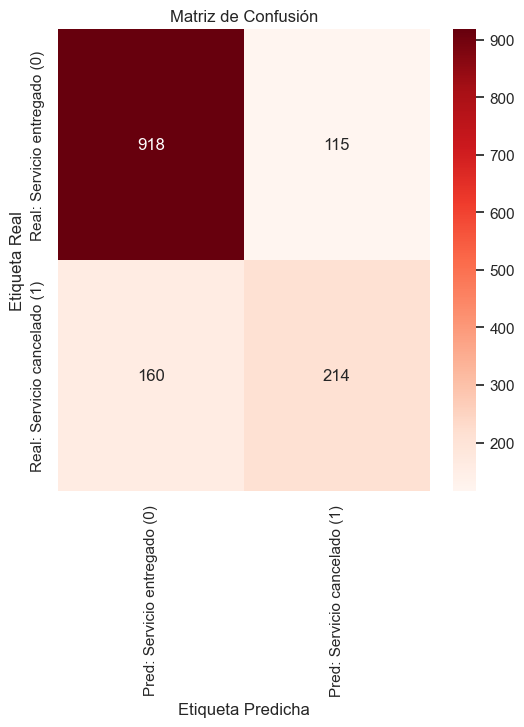

In [22]:
### TU CÓDIGO AQUÍ ###
cm = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds',
            xticklabels=['Pred: Servicio entregado (0)', 'Pred: Servicio cancelado (1)'],
            yticklabels=['Real: Servicio entregado (0)', 'Real: Servicio cancelado (1)'])
plt.title('Matriz de Confusión')
plt.ylabel('Etiqueta Real')
plt.xlabel('Etiqueta Predicha')
plt.show()

**Interpretación:**

**En el contexto de TelcoSur, ¿qué significan estos 4 cuadrantes?**

- **Verdaderos Negativos (VN): `918`**. Predijimos 'No Churn' y acertamos. ¡Cliente feliz! No gastamos recursos.
- **Verdaderos Positivos (VP): `214`**. Predijimos 'Churn' y acertamos. ¡Acierto! Identificamos a un cliente en riesgo de irse.
- **Falsos Positivos (FP): `115`**. Predijimos 'Churn' (1) pero el cliente se iba a quedar (0). **¡Error Tipo I! 💸** Este es el **costo de retención innecesario**: le daremos un descuento a un cliente que no lo necesitaba.
- **Falsos Negativos (FN): `160`**. Predijimos 'No Churn' (0) pero el cliente SÍ se fue (1). **¡Error Tipo II! ☠️** Este es el **peor error**: es un **cliente perdido** y todos sus ingresos futuros. El modelo falló en alertarnos.

### 6.2. Calcula el Reporte de Clasificación e interpreta los resultados según se indica

In [28]:
### TU CÓDIGO AQUÍ ###
print("--- Reporte de Clasificación (Scoring de Servicio) ---")
print(classification_report(y_test, y_pred_test, target_names=['Servicio entregado (0)', 'Servicio Cancelado (1)']))

# Calculamos la Especificidad manualmente (no viene en el reporte)
# Especificidad = VN / (VN + FP)
vn = cm[0, 0]
fp = cm[0, 1]
specificity = vn / (vn + fp)

print(f"Exactitud General: {accuracy_score(y_test, y_pred_test):.3f}")
print(f"Especificidad (Identificar Cliente Satisfecho): {specificity:.3f}")

--- Reporte de Clasificación (Scoring de Servicio) ---
                        precision    recall  f1-score   support

Servicio entregado (0)       0.85      0.89      0.87      1033
Servicio Cancelado (1)       0.65      0.57      0.61       374

              accuracy                           0.80      1407
             macro avg       0.75      0.73      0.74      1407
          weighted avg       0.80      0.80      0.80      1407

Exactitud General: 0.805
Especificidad (Identificar Cliente Satisfecho): 0.889


### 6.3. Interpreta el Accuracy o Exactitud

**Interpretación:** el accuracy = 0.805, es decir, el modelo acierta el 80.5 % de las veces al clasificar si un servicio fue entregado (0) o cancelado (1). Esto significa que de cada 100 servicios, aproximadamente 81 fueron clasificados correctamente, mientras que 19 se clasificaron erróneamente.

### 6.4. Interpreta la Precisión para la Clase 1 (Churn)

**Interpretación:** Una precisión del 65 % indica un nivel aceptable, pero no alto, especialmente si las acciones basadas en esa predicción tienen un costo (por ejemplo, contactar a un cliente pensando que canceló cuando en realidad no lo hizo).

### 6.5. Interpreta la Sensibilidad o Recall para la Clase 1 (Churn)

**Interpretación:** Esto significa que el modelo solo identifica correctamente el 57 % de los servicios realmente cancelados.

O dicho de otra forma:

- De cada 100 cancelaciones reales, el modelo detecta 57 como canceladas.

- Pero falla en 43, clasificándolas erróneamente como “servicio entregado”.

### 6.6. Interpreta la Especificidad

**Interpretación:** Una especificidad alta (0.889) indica que el modelo distingue muy bien a los clientes satisfechos, es decir:
- Comete pocos falsos positivos (pocas veces dice que un servicio fue cancelado cuando realmente fue entregado).
- Tiene un buen rendimiento en la clase mayoritaria (0).

Sin embargo:
- Esa fortaleza contrasta con la baja sensibilidad (recall = 0.57) de la clase 1, lo que muestra que el modelo favorece las predicciones de “servicio entregado”.

### 6.7. Interpreta el F1-Score

**Interpretación:**
- F1-score clase 0 (0.87): excelente capacidad para identificar servicios entregados.

- F1-score clase 1 (0.61): desempeño aceptable, pero podría mejorar en detección de cancelaciones.

- Promedio F1 (0.80): modelo globalmente bueno, pero con margen de mejora en la clase de mayor interés (cancelaciones).

**IMPORTANTE**

Para una campaña de retención de clientes, la métrica más importante es el RECALL (Sensibilidad).

Justificación: En casi todos los modelos de negocio de suscripción (como telecomunicaciones, banca o streaming), el costo de un Falso Negativo (perder un cliente por no identificarlo, Costo FN) es drásticamente mayor que el costo de un Falso Positivo (dar un descuento innecesario, Costo FP).

Perder un cliente implica perder todos sus ingresos futuros. Dar un descuento solo reduce el margen de un cliente que igual se iba a quedar. Por lo tanto, el objetivo estratégico de la empresa debe ser minimizar la cantidad de Falsos Negativos (no dejar que se vaya nadie que pudiéramos haber salvado), lo cual es exactamente lo que mide el Recall.

Nuestro modelo tiene un Recall de 0.57 (para Churn=1), lo que significa que solo estamos identificando al 57% de los clientes que realmente se van. La otra mitad se está yendo sin que hagamos nada. El negocio debe pedirnos mejorar esta métrica, incluso si eso significa bajar un poco la Precisión.

## Ejercicio 7: La Curva ROC y el Poder de Discriminación (AUC)

### 7.1. Grafica la Curva ROC

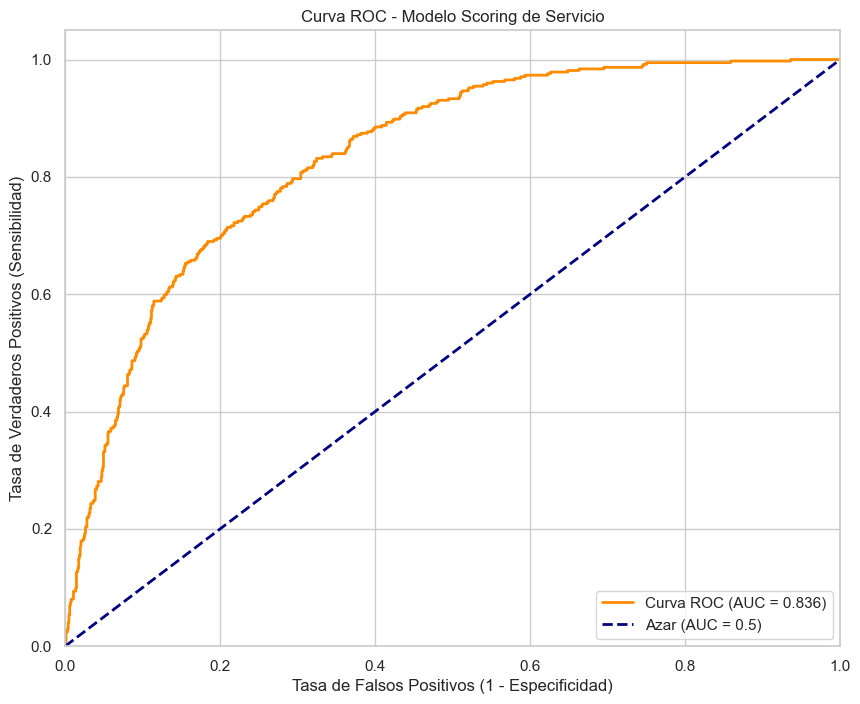

In [25]:
### TU CÓDIGO AQUÍ ###
fpr, tpr, thresholds = roc_curve(y_test, y_prob_test)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Azar (AUC = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (1 - Especificidad)')
plt.ylabel('Tasa de Verdaderos Positivos (Sensibilidad)')
plt.title('Curva ROC - Modelo Scoring de Servicio')
plt.legend(loc="lower right")
plt.show()

### 7.2. Calcula el Área Bajo la Curva

In [26]:
### TU CÓDIGO AQUÍ ###
print(f"El Área Bajo la Curva (AUC) es: {roc_auc:.3f}")

El Área Bajo la Curva (AUC) es: 0.836


**Interpretación Final:**

Nuestro modelo tiene un **AUC de 0.84**, lo cual es **excelente**. Esto nos dice que el modelo *sí tiene poder para discriminar* entre clientes que se van y clientes que se quedan.

El problema **no es el modelo, es el umbral de decisión (0.5)**. Ese umbral nos da un **Recall de 0.57**, lo cual es inaceptable para el negocio porque perdemos casi la mitad de los clientes en riesgo.

**Siguiente Paso (Decisión de Negocio):** Como científicos de datos, nuestra recomendación a TelcoSur sería: "El modelo es bueno (alto AUC), pero debemos **bajar el umbral de decisión** (ej. a 0.3) para **aumentar el Recall** y 'atrapar' a más clientes que se van. Esto aumentará los Falsos Positivos (daremos más descuentos innecesarios), pero el análisis costo-beneficio muestra que es más rentable retener a un cliente que ahorrar un descuento."